In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.metrics import classification_report, accuracy_score

%matplotlib inline

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
load_data = pd.read_csv('./data/train.csv', usecols=['AnimalID', 'DateTime', 'OutcomeType', 'OutcomeSubtype'
                                                     , 'AnimalType', 'SexuponOutcome'
                                                     , 'AgeuponOutcome', 'Breed', 'Color'])

## 1. Preprocessing

In [3]:
load_data.head()

,AnimalID,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


### 1.1 Data Changed in Data Frame

In [4]:
# delete Nan data.
#x_data = load_data.dropna()
x_data = load_data

In [5]:
'''
data1 = []
for i in x_data['AgeuponOutcome'] :
    data = i.split(' ')
    if('year' in data[1] ):
        data1.append(int(data[0]) * 365)
    elif('month' in data[1]):
        data1.append(int(data[0]) * 31)
    elif('week' in data[1]):
        data1.append(int(data[0]) * 7)
    elif('day' in data[1]):
        data1.append(int(data[0]))
        
len(data1)
'''

"\ndata1 = []\nfor i in x_data['AgeuponOutcome'] :\n    data = i.split(' ')\n    if('year' in data[1] ):\n        data1.append(int(data[0]) * 365)\n    elif('month' in data[1]):\n        data1.append(int(data[0]) * 31)\n    elif('week' in data[1]):\n        data1.append(int(data[0]) * 7)\n    elif('day' in data[1]):\n        data1.append(int(data[0]))\n        \nlen(data1)\n"

In [6]:
def f(data):
    if('year' in data[1]):
        return int(data[0]) * 365
    elif('month' in data[1]):
        return int(data[0]) * 31
    elif('week' in data[1]):
        return int(data[0]) * 7
    elif('day' in data[1]):
        return int(data[0])    
       

In [7]:
x_data['AgeuponOutcome'].head()

0     1 year
1     1 year
2    2 years
3    3 weeks
4    2 years
Name: AgeuponOutcome, dtype: object

In [8]:
set(x_data['AgeuponOutcome'])

{nan,
 '6 years',
 '8 months',
 '2 months',
 '11 months',
 '10 years',
 '10 months',
 '5 days',
 '17 years',
 '1 year',
 '7 years',
 '6 months',
 '13 years',
 '15 years',
 '14 years',
 '6 days',
 '8 years',
 '1 weeks',
 '2 days',
 '1 day',
 '5 years',
 '9 years',
 '4 months',
 '3 months',
 '18 years',
 '1 week',
 '3 years',
 '4 days',
 '4 weeks',
 '12 years',
 '0 years',
 '2 years',
 '2 weeks',
 '3 days',
 '5 months',
 '9 months',
 '3 weeks',
 '1 month',
 '16 years',
 '20 years',
 '19 years',
 '5 weeks',
 '11 years',
 '7 months',
 '4 years'}

In [9]:
# Find Nan Data
# fill nan data to '0 day'
head_name = x_data.columns[1:7]

for h in head_name:
    if(h == 'AgeuponOutcome'):
        x_data[h] = x_data[h].fillna('0 years')
    else:
        x_data[h] = x_data[h].fillna('Unknown')

#x_data['AgeuponOutcome'] = x_data['AgeuponOutcome'].fillna('0 day')

In [10]:
x_train = pd.DataFrame(data = x_data)
x_train.head()

,AnimalID,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,2014-02-12 18:22:00,Return_to_owner,Unknown,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [11]:
a = lambda x : f(x.split(' '))

x_train['AgeuponOutcome'] = x_train['AgeuponOutcome'].apply(a)
x_train.head()

,AnimalID,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,2014-02-12 18:22:00,Return_to_owner,Unknown,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White
1,A656520,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby
2,A686464,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,730,Pit Bull Mix,Blue/White
3,A683430,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream
4,A667013,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan


In [12]:
# delete Data Column -> DateTime
x_train.drop('DateTime', axis=1, inplace=True)
x_train.drop('AnimalID', axis=1, inplace=True)
x_train

,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Return_to_owner,Unknown,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White
1,Euthanasia,Suffering,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby
2,Adoption,Foster,Dog,Neutered Male,730,Pit Bull Mix,Blue/White
3,Transfer,Partner,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream
4,Transfer,Partner,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan
5,Transfer,Partner,Dog,Intact Female,31,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,Transfer,Partner,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Tabby
7,Transfer,Partner,Cat,Unknown,21,Domestic Shorthair Mix,Brown Tabby
8,Adoption,Unknown,Dog,Spayed Female,155,American Pit Bull Terrier Mix,Red/White
9,Adoption,Offsite,Dog,Spayed Female,365,Cairn Terrier,White


In [13]:
# Changed data to label for classification.
fit_headers = ['OutcomeType', 'OutcomeSubtype', 'AnimalType', 'SexuponOutcome', 'Breed', 'Color']
le = LabelEncoder()

for i in enumerate(fit_headers):
    x_train[i[1]] = le.fit_transform(x_train[i[1]])
x_train.head()

,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,3,16,1,2,365,1221,130
1,2,15,0,3,365,640,167
2,0,6,1,2,730,1066,86
3,4,12,0,1,21,640,42
4,4,12,1,2,730,914,274


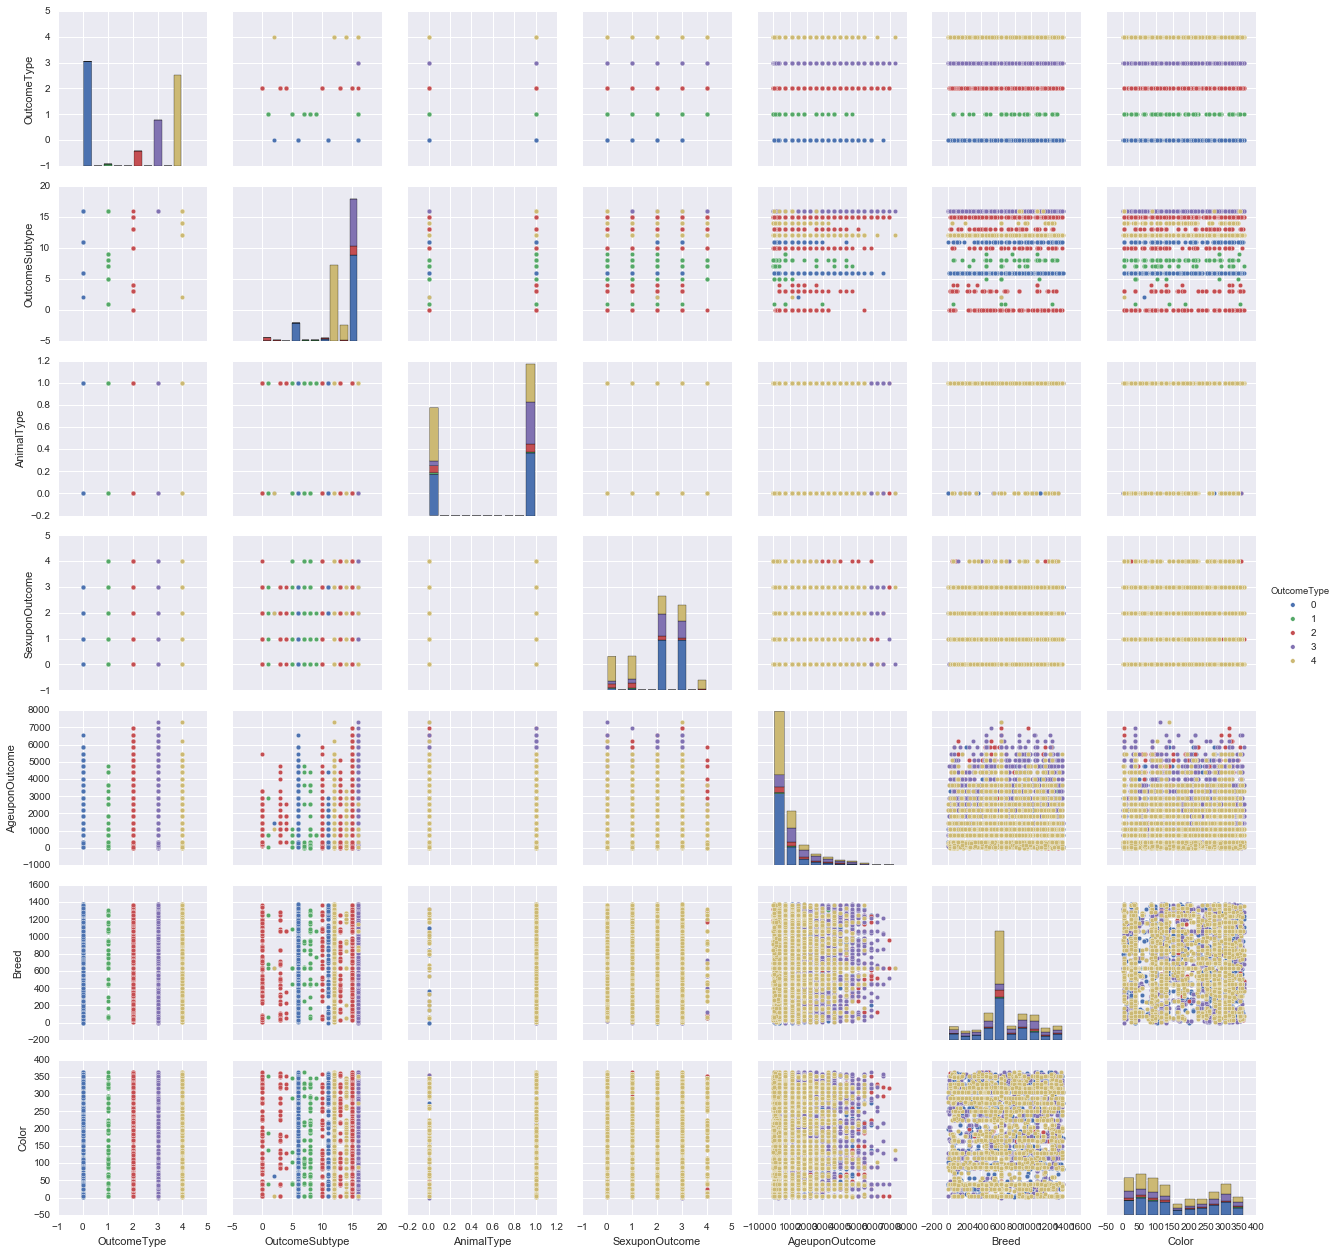

In [14]:
sns.pairplot(x_train, hue='OutcomeType')
plt.show()

In [15]:
# Check the outcome possibility
x_train['OutcomeType'].unique()

array([3, 2, 0, 4, 1], dtype=int64)

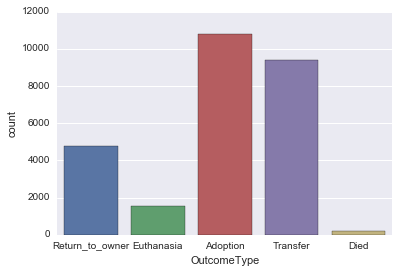

In [16]:
# See the distribution of outcome
sns.countplot(x = 'OutcomeType',data = x_data)

In [17]:
y_train = x_train["OutcomeType"]
y_train[0:10]

0    3
1    2
2    0
3    4
4    4
5    4
6    4
7    4
8    0
9    0
Name: OutcomeType, dtype: int64

In [20]:
x_train_data = x_train.loc[:,('AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color')]
x_train_data.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,2,365,1221,130
1,0,3,365,640,167
2,1,2,730,1066,86
3,0,1,21,640,42
4,1,2,730,914,274


In [21]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_train_data, y_train, train_size =15000, test_size= 11000)

In [22]:
from sklearn.ensemble import RandomForestClassifier
# Do random forest
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train_rf, y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [23]:
print(classification_report(y_test_rf, rf.predict(x_test_rf)))
print(accuracy_score(y_test_rf, rf.predict(x_test_rf)))

             precision    recall  f1-score   support

          0       0.66      0.73      0.69      4446
          1       0.07      0.01      0.02        75
          2       0.20      0.13      0.16       614
          3       0.40      0.39      0.39      1977
          4       0.67      0.63      0.65      3888

avg / total       0.58      0.60      0.59     11000

0.596454545455


In [25]:
load_test_data = pd.read_csv('./data/test.csv', usecols=['AnimalType', 'SexuponOutcome'
                                                     , 'AgeuponOutcome', 'Breed', 'Color'])
load_test_data.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [36]:
x_test = pd.DataFrame(data=load_test_data)
len(x_test)

11456

In [27]:
head_name = x_test.columns

for h in head_name:
    if(h == 'AgeuponOutcome'):
        x_test[h] = x_test[h].fillna('0 years')
    else:
        x_test[h] = x_test[h].fillna('Unknown')

In [28]:
x_test.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [29]:
set(x_test['AgeuponOutcome'])

{'0 years',
 '1 day',
 '1 month',
 '1 week',
 '1 weeks',
 '1 year',
 '10 months',
 '10 years',
 '11 months',
 '11 years',
 '12 years',
 '13 years',
 '14 years',
 '15 years',
 '16 years',
 '17 years',
 '18 years',
 '19 years',
 '2 days',
 '2 months',
 '2 weeks',
 '2 years',
 '20 years',
 '22 years',
 '3 days',
 '3 months',
 '3 weeks',
 '3 years',
 '4 days',
 '4 months',
 '4 weeks',
 '4 years',
 '5 days',
 '5 months',
 '5 weeks',
 '5 years',
 '6 days',
 '6 months',
 '6 years',
 '7 months',
 '7 years',
 '8 months',
 '8 years',
 '9 months',
 '9 years'}

In [30]:
a = lambda x : f(x.split(' '))

x_test['AgeuponOutcome'] = x_test['AgeuponOutcome'].apply(a)
x_test.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Dog,Intact Female,310,Labrador Retriever Mix,Red/White
1,Dog,Spayed Female,730,German Shepherd/Siberian Husky,Black/Tan
2,Cat,Neutered Male,365,Domestic Shorthair Mix,Brown Tabby
3,Dog,Intact Male,124,Collie Smooth Mix,Tricolor
4,Dog,Neutered Male,730,Miniature Poodle Mix,White


In [31]:
# Changed data to label for classification.
fit_headers = ['AnimalType', 'SexuponOutcome', 'Breed', 'Color']
le = LabelEncoder()

for i in enumerate(fit_headers):
    x_test[i[1]] = le.fit_transform(x_test[i[1]])
x_test.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,0,310,542,185
1,1,3,730,460,28
2,0,2,365,407,79
3,1,1,124,345,229
4,1,2,730,633,238


In [38]:
y_test = rf.predict(x_test)
y_test_proba = rf.predict_proba(x_test)
y_test_proba

array([[ 0.052     ,  0.        ,  0.006     ,  0.05      ,  0.892     ],
       [ 0.6702381 ,  0.        ,  0.        ,  0.31835714,  0.01140476],
       [ 0.27428726,  0.        ,  0.01058333,  0.2097213 ,  0.5054081 ],
       ..., 
       [ 0.09325   ,  0.001     ,  0.03311276,  0.051     ,  0.82163724],
       [ 0.3436    ,  0.        ,  0.04      ,  0.54643333,  0.06996667],
       [ 0.025     ,  0.        ,  0.03761667,  0.287     ,  0.65038333]])

In [39]:
for i in y_test_proba:
    print(i)

[ 0.052  0.     0.006  0.05   0.892]
[ 0.6702381   0.          0.          0.31835714  0.01140476]
[ 0.27428726  0.          0.01058333  0.2097213   0.5054081 ]
[ 0.035  0.     0.023  0.041  0.901]
[ 0.46383333  0.          0.158       0.12883333  0.24933333]
[ 0.305  0.     0.053  0.589  0.053]
[ 0.212  0.     0.156  0.518  0.114]
[ 0.81506667  0.          0.001       0.031       0.15293333]
[ 0.931  0.     0.     0.026  0.043]
[ 0.34602229  0.00066667  0.0005      0.3790772   0.27373384]
[ 0.895  0.     0.     0.003  0.102]
[ 0.06        0.25        0.14058333  0.34745833  0.20195833]
[ 0.53478333  0.          0.          0.04895     0.41626667]
[ 0.46383333  0.          0.158       0.12883333  0.24933333]
[ 0.76869206  0.          0.          0.1477246   0.08358333]
[ 0.785  0.     0.     0.02   0.195]
[ 0.6205      0.          0.04        0.21591667  0.12358333]
[ 0.4198447   0.          0.007       0.29512991  0.2780254 ]
[ 0.15941667  0.001       0.0015      0.13416667  0.7039166